<a href="https://colab.research.google.com/github/arshjeevs/Minor-Labs/blob/main/Lab_4_Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip

--2025-04-04 02:35:14--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip’

abalone.zip             [ <=>                ]  54.06K  --.-KB/s    in 0.1s    

2025-04-04 02:35:15 (406 KB/s) - ‘abalone.zip’ saved [55357]



In [2]:
!unzip /content/abalone.zip

Archive:  /content/abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


Data Exploration with Pandas

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("/content/abalone.data")

In [64]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [65]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [67]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [68]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop('Rings', axis=1)
y = df['Rings']

le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3340, 8)
y_train shape: (3340,)
X_test shape: (836, 8)
y_test shape: (836,)


Abalone Dataset using Sci-Kit Learn

In [83]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
regr = MLPRegressor(hidden_layer_sizes=(10,100,1000,100,10), activation='relu',
solver='adam', random_state=42, max_iter=1000)
regr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 100, 1000, 100, 10), max_iter=1000,
             random_state=42)

In [85]:
y_pred = regr.predict(X_test)

print("Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

accuracy = r2_score(y_test, y_pred)
print(f"Accuracy (R-squared): {accuracy}")

Regression Results:
Mean Squared Error: 4.271362500371625
R-squared (R2) Score: 0.6142660597159304
Accuracy (R-squared): 0.6142660597159304


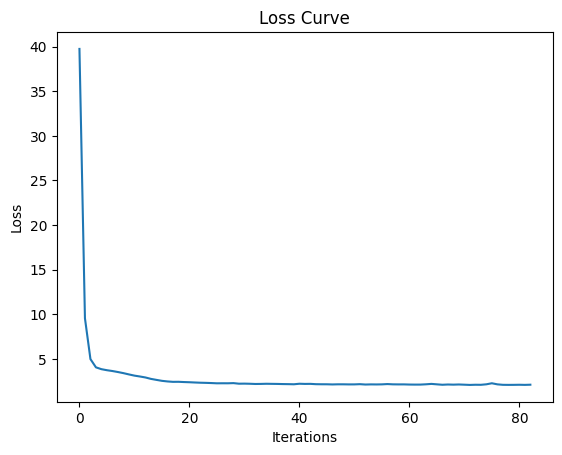

In [74]:
plt.plot(regr.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

ANN using Tensorflow

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [89]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Added MAE metric

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 76.4314 - mae: 7.8906 - val_loss: 19.9481 - val_mae: 3.5322
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.0676 - mae: 3.1582 - val_loss: 7.1947 - val_mae: 1.9531
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6102 - mae: 1.9602 - val_loss: 6.0717 - val_mae: 1.7157
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9070 - mae: 1.7463 - val_loss: 5.4811 - val_mae: 1.6971
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4275 - mae: 1.6553 - val_loss: 5.3935 - val_mae: 1.6399
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1456 - mae: 1.6210 - val_loss: 5.1565 - val_mae: 1.6314
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7339 - mae: 1.6231 - val_loss: 5.0368 - val_mae: 1.6370
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2331 - mae: 1.6401 - val_loss: 4.9474 - val_mae: 1.6144
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4

In [91]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on test set: {mae}")

y_pred = model.predict(X_test)

print("ANN Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Absolute Error on test set: 1.4733582735061646
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN Regression Results:
Mean Squared Error: 4.202587604522705
R-squared (R2) Score: 0.6204769015312195


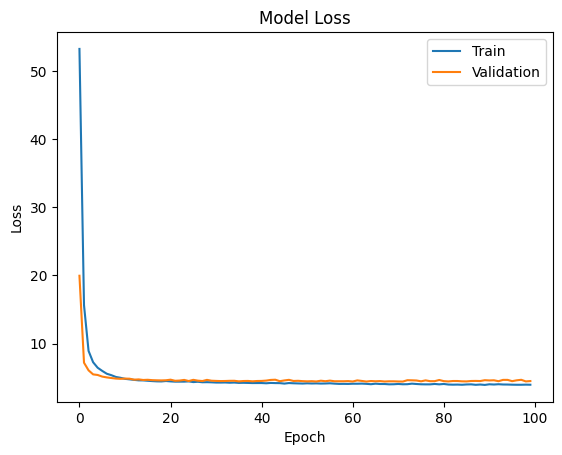

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

SVR using Scikit Learn

In [93]:
from sklearn.svm import SVR

In [94]:
svr_model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [95]:
# Make predictions
svr_predictions = svr_model.predict(X_test)

In [96]:
# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("SVR Regression Results:")
print("Mean Squared Error:", svr_mse)
print("R-squared (R2) Score:", svr_r2)

SVR Regression Results:
Mean Squared Error: 4.573522661544604
R-squared (R2) Score: 0.5869788815483123
